***********************************************************
# **Citation requested: Rajen Bhatt, Abhinav Dhall, 'Skin Segmentation Dataset', UCI Machine Learning Repository**
***********************************************************

# **Importing of the 'basic' packages**

In [ ]:
import numpy as np
import matplotlib as plt
import pandas as pd

# **Reading the dataset**

In [ ]:
#upload of the dataset changing the names of the fields
df = pd.read_csv(r'Skin_NonSkin.txt', names= ["B", "R", "G", "skin"], sep='\t', header=None)

# **Data preparation**

# Some info on dataset and a small adjustment




In [ ]:
df.head(10)

,B,R,G,skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1
5,69,80,118,1
6,70,81,119,1
7,70,81,119,1
8,76,87,125,1
9,76,87,125,1


In [ ]:
df #info on the dataset

,B,R,G,skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1
...,...,...,...,...
245052,163,162,112,2
245053,163,162,112,2
245054,163,162,112,2
245055,163,162,112,2


In [ ]:
df.skin = df.skin.replace([2], 0) #changing of the value '2'-->'0' in the field 'skin'

In [ ]:
print(df)

          B    R    G  skin
0        74   85  123     1
1        73   84  122     1
2        72   83  121     1
3        70   81  119     1
4        70   81  119     1
...     ...  ...  ...   ...
245052  163  162  112     0
245053  163  162  112     0
245054  163  162  112     0
245055  163  162  112     0
245056  255  255  255     0

[245057 rows x 4 columns]


(array([194198.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  50859.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

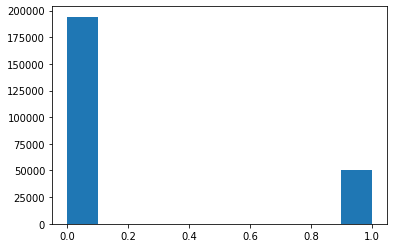

In [ ]:
plt.pyplot.hist(df.skin)

# NaN check



In [ ]:
df.isna().sum() #NaN

B       0
R       0
G       0
skin    0
dtype: int64

# **10-fold-CV**

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
df_copy = df.copy()

In [ ]:
del df_copy['skin']

In [ ]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SGDClassifier())
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, df_copy, df.skin, cv=10)
scores

array([0.79764139, 0.8911287 , 0.97951522, 0.96139721, 0.97649555,
       0.96919122, 0.92736473, 0.9143032 , 0.92711691, 0.91263008])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.93 accuracy with a standard deviation of 0.05


# **Interesting fact**

The score result is very close to the result reached up by Bhatt et. al (2009): they used the same dataset (with less observation), the IB3 algorithm and Fuzzy Decision Tree as method for classification. In particular, they reached 94.10% of mean of corrected classified data with a 10-fold-cross-validation (the same estimation method and metrics that I just used).
What I want to underline is that SGD (with 'hinge' loss function) is a worse (but not bad!) alternative to the method proposed by the authors in their article. 

# **Train/test set splitting e standardization**

In [ ]:
print(df)

          B    R    G  skin
0        74   85  123     1
1        73   84  122     1
2        72   83  121     1
3        70   81  119     1
4        70   81  119     1
...     ...  ...  ...   ...
245052  163  162  112     0
245053  163  162  112     0
245054  163  162  112     0
245055  163  162  112     0
245056  255  255  255     0

[245057 rows x 4 columns]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
skin = df.skin

In [ ]:
print(skin)

0         1
1         1
2         1
3         1
4         1
         ..
245052    0
245053    0
245054    0
245055    0
245056    0
Name: skin, Length: 245057, dtype: int64


In [ ]:
del df['skin']

In [ ]:
print(df)

          B    R    G
0        74   85  123
1        73   84  122
2        72   83  121
3        70   81  119
4        70   81  119
...     ...  ...  ...
245052  163  162  112
245053  163  162  112
245054  163  162  112
245055  163  162  112
245056  255  255  255

[245057 rows x 3 columns]


In [ ]:
#splitting the sample in training and test set
df_train, df_test, skin_train, skin_test = train_test_split(df, skin, test_size=0.25, random_state = 1313)
df_test

,B,R,G
69585,18,17,3
88494,76,81,36
240231,199,197,162
12680,57,110,173
202282,176,174,126
...,...,...,...
91922,35,36,10
30028,98,141,214
55058,19,16,1
147250,2,5,0


In [ ]:
scaler = StandardScaler()
RGB_train = scaler.fit(df_train)
RGB_train = scaler.transform(df_train)
RGB_test = scaler.fit(df_test)
RGB_test = scaler.transform(df_test)

RGB_train, RGB_test

(array([[-1.30109567, -1.49283829, -1.24337155],
        [-0.9315899 , -1.07553371, -1.36741791],
        [ 0.24118927,  0.10961129, -0.48531047],
        ...,
        [-0.9797863 , -0.20754019,  0.85163362],
        [-0.8833935 , -0.99207279, -1.36741791],
        [-0.33716758,  0.04284256,  1.03081169]]),
 array([[-1.72271788, -1.92757308, -1.65422161],
        [-0.79152321, -0.86159576, -1.19959729],
        [ 1.18325171,  1.07048813,  0.53624103],
        ...,
        [-1.7066628 , -1.94422898, -1.6817746 ],
        [-1.97959917, -2.12744383, -1.6955511 ],
        [-0.6309724 , -0.77831629, -1.14449131]]))

In [ ]:
import time

# **SGD**

# Estimation with **SGD** algorithm; loss functions: 'log', 'modified_huber', 'squared_hinge', 'perceptron'

In [ ]:
tempi = np.empty((10,5))
scores = np.empty((10,5))
iter = np.empty((10,5))
loss_f = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']

for i in range(5):
 n = 0
 for n in range(10):
  clf = SGDClassifier(loss = loss_f[i], n_iter_no_change=2, tol=1e-2, alpha=0, early_stopping=True, learning_rate='constant', eta0 = 0.01)
  start = time.time()
  clf.fit(RGB_train, skin_train, coef_init = [[0,0,0]]) #stima
  end = time.time()

 #tempi
  tempo = end - start
  tempi[n,i] = tempo

 #scores
  clf_score = clf.score(RGB_test, skin_test)
  scores[n,i] = clf_score

 #iterazioni
  iterazioni = clf.n_iter_
  iter[n,i] = iterazioni

 #coefficienti
 coefficients = clf.coef_

In [ ]:
number_of_iterations = pd.DataFrame(iter, columns = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'])
number_of_iterations

,hinge,log,modified_huber,squared_hinge,perceptron
0,3.0,3.0,3.0,3.0,3.0
1,3.0,3.0,3.0,3.0,3.0
2,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0
5,3.0,3.0,3.0,3.0,3.0
6,3.0,3.0,3.0,3.0,3.0
7,3.0,3.0,3.0,3.0,3.0
8,3.0,3.0,3.0,3.0,3.0
9,3.0,3.0,3.0,3.0,3.0


In [ ]:
mean_times_to_estimation = np.mean(tempi, axis=0)
mean_times_to_estimation = pd.DataFrame(mean_times_to_estimation, columns = ['Mean of time to estimate (seconds)'], index=['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'])
mean_times_to_estimation

,Mean of time to estimate (seconds)
hinge,0.671825
log,0.748925
modified_huber,0.740531
squared_hinge,0.408431
perceptron,0.345397


In [ ]:
mean_scores = np.mean(scores, axis=0)
mean_scores = pd.DataFrame(mean_scores, columns = ['Mean scores'], index=['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'])
mean_scores

,Mean scores
hinge,0.928196
log,0.919767
modified_huber,0.921621
squared_hinge,0.889774
perceptron,0.895614


In [ ]:
mean_number_iterations = np.mean(iter, axis=0)
mean_number_iterations = pd.DataFrame(mean_number_iterations, columns = ['Mean number of iterations'], index=['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'])
mean_number_iterations

,Mean number of iterations
hinge,3.0
log,3.0
modified_huber,3.0
squared_hinge,3.0
perceptron,3.0


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Estimation with **SAG, SAGA** and **LGBFS** algorithms; loss function: 'log'

In [ ]:
tempi = np.empty((10,3))
scores = np.empty((10,3))
iter = np.empty((10,3))
alg = ['saga', 'sag', 'lbfgs']

for i in range(3):
 n = 0
 for n in range(10):
  clf2 = LogisticRegression(solver=alg[i])
  start = time.time()
  clf2.fit(RGB_train, skin_train) #stima
  end = time.time()

 #tempi
  tempo = end - start
  tempi[n,i] = tempo

 #scores
  clf2_score = clf2.score(RGB_test, skin_test)
  scores[n,i] = clf2_score

 #iterazioni
  iterazioni = clf2.n_iter_
  iter[n,i] = iterazioni

In [ ]:
mean_times_to_estimation = np.mean(tempi, axis=0)
mean_times_to_estimation = pd.DataFrame(mean_times_to_estimation, columns = ['Mean of time to estimate (seconds)'], index=['saga', 'sag', 'lbfgs'])
mean_times_to_estimation

,Mean of time to estimate (seconds)
saga,1.498305
sag,2.088995
lbfgs,0.361666


In [ ]:
mean_scores = np.mean(scores, axis=0)
mean_scores = pd.DataFrame(mean_scores, columns = ['Mean scores'], index=['saga', 'sag', 'lbfgs'])
mean_scores

,Mean scores
saga,0.919378
sag,0.919386
lbfgs,0.919383


In [ ]:
mean_number_iterations_log = np.mean(iter, axis=0)
mean_number_iterations_log = pd.DataFrame(mean_number_iterations_log, columns = ['Mean number of iterations'], index=['saga', 'sag', 'lbfgs'])
mean_number_iterations_log

,Mean number of iterations
saga,14.7
sag,23.2
lbfgs,12.0


(Another possible way to view results)

In [ ]:
print(tempi)
print(    )
print(scores)
print(    )
print(iter)
print(    )
print("*********************************************************************************")
print("                                    MEANS                                        ")
print("*********************************************************************************")
print(    )
print("%0.2f seconds with a standard deviation of %0.2f" % (tempi.mean(), tempi.std()))
print(    )
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print(    )
print("%0.2f iterations with a standard deviation of %0.2f" % (iter.mean(), iter.std()))

[[1.34931636 2.12374902 0.33746481]
 [1.53016806 2.29534507 0.4871757 ]
 [1.4161551  2.23578978 0.34880328]
 [1.55848408 2.47651076 0.33971572]
 [1.54606199 1.78738785 0.35471392]
 [1.57935405 2.22726417 0.34330773]
 [1.3731854  1.84259605 0.3494432 ]
 [1.64907598 1.89736843 0.36350298]
 [1.3771956  1.88215804 0.34631753]
 [1.60405684 2.12178421 0.34621286]]

[[0.91936669 0.91936669 0.91938301]
 [0.91938301 0.91938301 0.91938301]
 [0.91938301 0.91938301 0.91938301]
 [0.91938301 0.91936669 0.91938301]
 [0.91938301 0.9194483  0.91938301]
 [0.91936669 0.91938301 0.91938301]
 [0.91936669 0.91938301 0.91938301]
 [0.91938301 0.91938301 0.91938301]
 [0.91938301 0.91938301 0.91938301]
 [0.91938301 0.91938301 0.91938301]]

[[13. 24. 12.]
 [15. 27. 12.]
 [15. 25. 12.]
 [16. 26. 12.]
 [15. 20. 12.]
 [15. 23. 12.]
 [13. 20. 12.]
 [16. 22. 12.]
 [13. 21. 12.]
 [16. 24. 12.]]

*********************************************************************************
                                    MEANS 

# **Interesting facts**


The objective of my implementation was to practically confirm that SGD algorithms are **"particularly suitable for large scale applications"** (Zhang, 2004). I took in considerations three different perspectives:

1. the score with all the loss function;
2. the number of iterations (for all the loss functions);
3. the time to estimate.

For all those three points my results confirm the effectiveness of SGD on large scale problems.

One can also compare the performances of SGD with respect of SAGA, SAG and LBFGS. In particular, I showed that, even if all the three algorithms that I just mentioned are good for large datasets because they are fast (as said here --> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) **SGD has a better performance in terms of number of iterations and time to estimate.**

In order to tune parameters of **SGD** I followed the indications of Zhang (2004):
- I choosed to set the regularization term to 0 because even without it the algorithm has an implicit regularization effect;
- "instead of considering complicated schemes for choosing learning rate, we may simply fix it to a predetermined small constant, and then run the SGD until satisfactory convergence is achieved";
- the parameter 'early-stopping', set as 'True', stops the algorithm as the difference between the best loss reached up by the algorithm and the loss reached up at every epoch is smaller than the parameter 'tol' for 'n_iter_no_change' consecutive epochs. By setting 'n_iter_no_change' = 2 I obtained a mean number of 3 iterations for all the loss functions.

---------------------------------------

One can also set the logistic regression parameter 'max_iter' = 3, equaling the results of SGD in terms of iterations and improving results of estimation time, by not decreasing the score too much. Anyway, the message that you get in this way is of failing to convergence (the algorihm stops before reaching the convergence).  

**In practical terms, all those algorithms (SGD, SAGA, SAG and LGBFGS), implemented with the relative loss functions, are good instruments to face this (quiete simple) dataset.**


In [ ]:
#creation of a unique dataframe to view results on a histogram
iterations_comparison = pd.merge(mean_number_iterations, mean_number_iterations_log, how='outer')
iterations_comparison = iterations_comparison.set_axis(['SGD(hinge)', 'SGD(log)', 'SGD(modified_huber)', 'SGD(squared_hinge)', 'SGD(perceptron)', 'SAGA(log)', 'SAG(log)', 'LBGFS(log)'], axis='index')
iterations_comparison            

,Mean number of iterations
SGD(hinge),3.0
SGD(log),3.0
SGD(modified_huber),3.0
SGD(squared_hinge),3.0
SGD(perceptron),3.0
SAGA(log),14.7
SAG(log),23.2
LBGFS(log),12.0


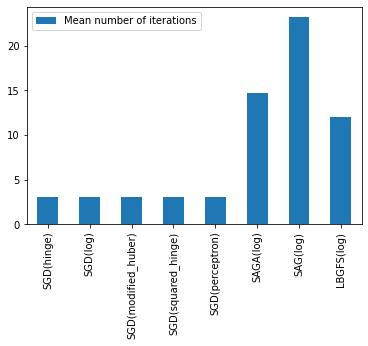

In [ ]:
iterations_comparison.plot.bar()